In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

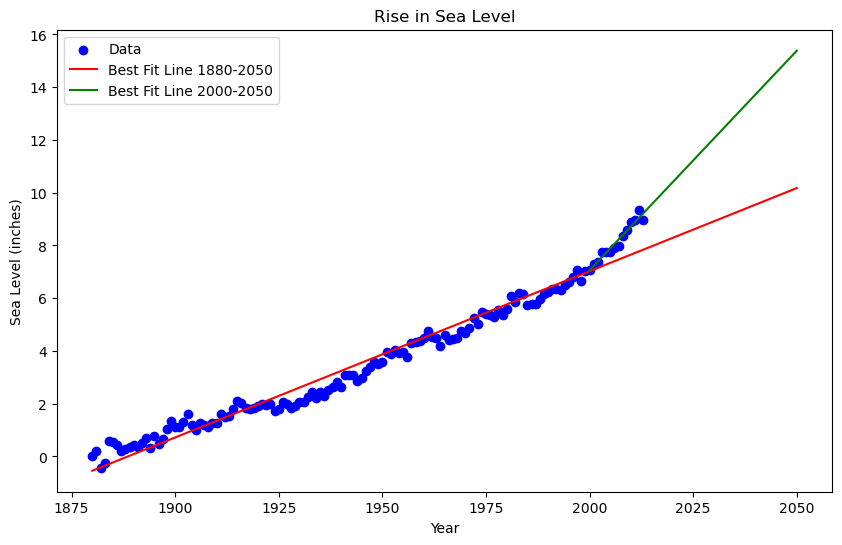

In [2]:
def draw_plot():
    
    df = pd.read_csv('epa-sea-level.csv')
    
    
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue', label='Data')

    # Step 3: Line of best fit for all data (1880 - 2014)
    slope1, intercept1, _, _, _ = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
      
    years_extended = pd.Series(range(1880, 2051))
    
    # Calculate corresponding y values using the line equation: y = mx + b
    sea_level_predicted_1 = intercept1 + slope1 * years_extended
    plt.plot(years_extended, sea_level_predicted_1, color='red', label='Best Fit Line 1880-2050')

    # Step 4: Line of best fit for data from year 2000 to the most recent year
    df_2000 = df[df['Year'] >= 2000]
    slope2, intercept2, _, _, _ = linregress(df_2000['Year'], df_2000['CSIRO Adjusted Sea Level'])
    
    years_recent = pd.Series(range(2000, 2051))
      
    sea_level_predicted_2 = intercept2 + slope2 * years_recent
    plt.plot(years_recent, sea_level_predicted_2, color='green', label='Best Fit Line 2000-2050')

    # Step 5: Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
    plt.legend()
    
    # Step 6: Save the plot
    plt.savefig('sea_level_plot.png')
    plt.show()

draw_plot()